In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

**Importing  Dataset**


In [2]:
df = pd.read_csv('/content/Clean_Dataset.csv (1).zip')
df.head(15)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


**dataset infomation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


**describe the dataset**

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.shape

(300153, 12)

**Checking Missing Values**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


**flight ticket price dustribution**

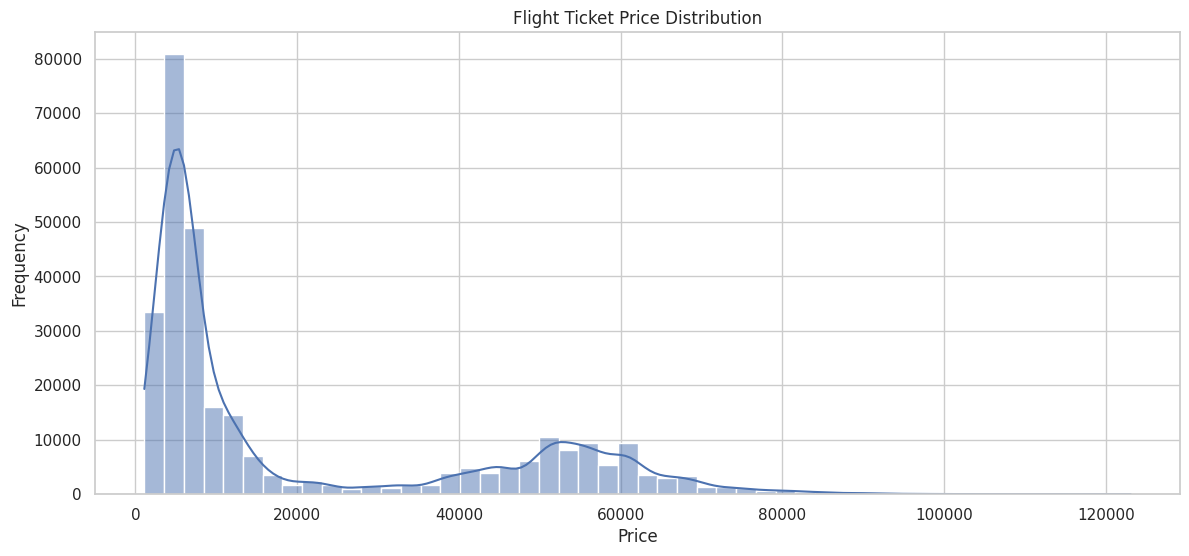

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot histogram + KDE for price
sns.histplot(df['price'], bins=50, kde=True)

# Customize plot
plt.title("Flight Ticket Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Show plot
plt.show()


 Observation from Price Distribution:

Most flight tickets are priced below ₹20,000.

A few flights go above ₹50,000, which might be business class or rare routes.

The distribution is right-skewed, meaning most flights are cheap, but a few are very expensive. **bold text**

**Airline vs Price Insights:**

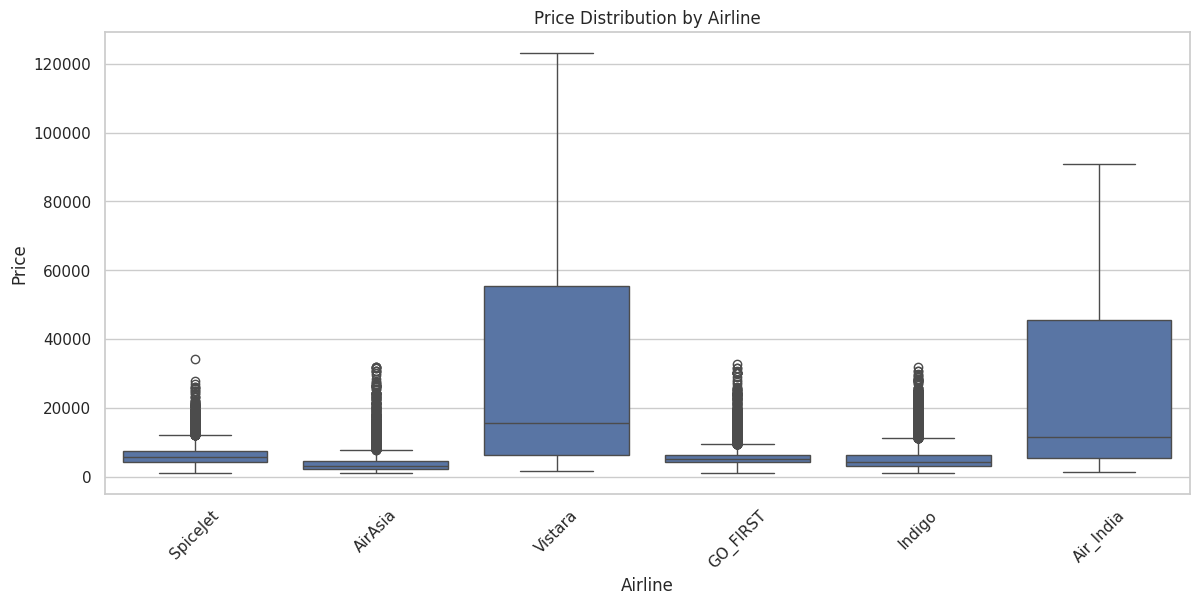

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Boxplot of Airline vs Price
sns.boxplot(data=df, x='airline', y='price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Price Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")

# Show the plot
plt.show()


Vistara and Air India have higher price ranges (likely due to Business class offerings).

SpiceJet, IndiGo, and GO_FIRST offer lower prices — your budget airline buddies.
bold text


**how the number of stops affects flight price**

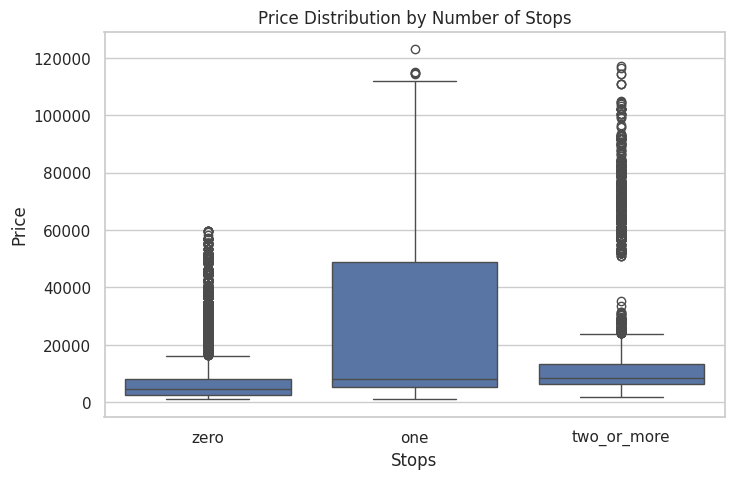

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plot boxplot: Stops vs Price
sns.boxplot(data=df, x='stops', y='price')

# Add titles and labels
plt.title("Price Distribution by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price")

# Show the plot
plt.show()


 non-stop Business class flights more expensive

Economy bringing down the average price of non-stop flight

**Which time of the day usually has higher ticket prices**

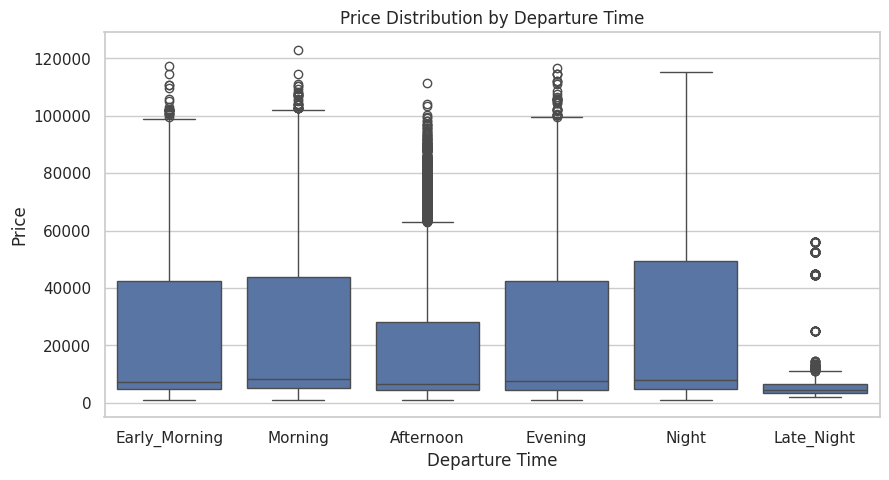

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 5))

# Boxplot for price by departure time
sns.boxplot(data=df, x='departure_time', y='price', order=[
    'Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'
])

# Titles and labels
plt.title("Price Distribution by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")

# Show plot
plt.show()


**which city pairs (source → destination) have higher average flight prices for economy class**

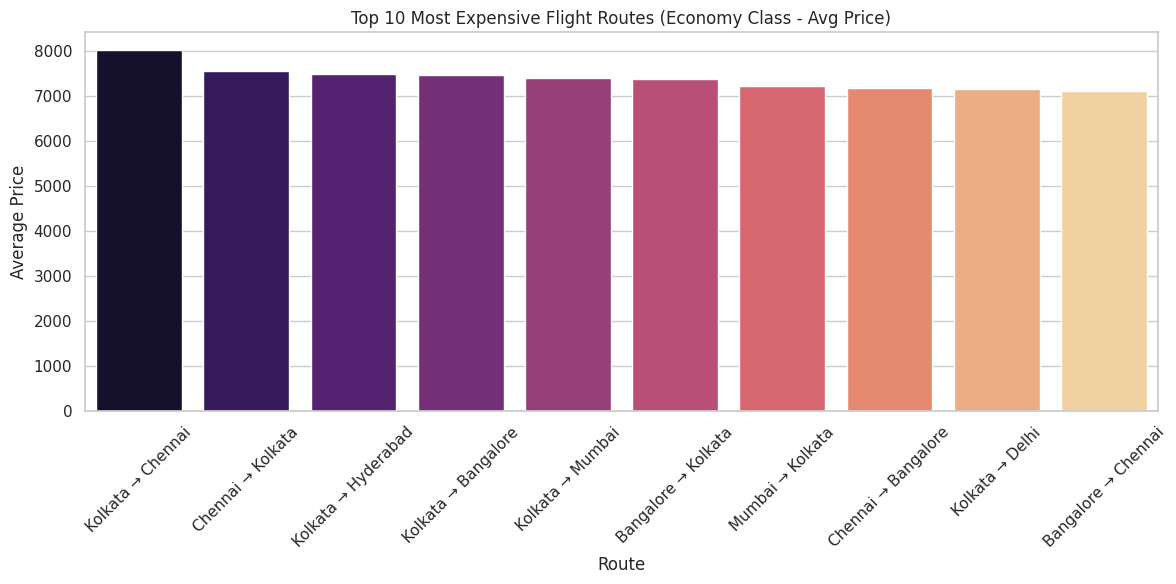

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Filter for Economy class only
economy_df = df[df['class'] == 'Economy']

# Create a new column for route
economy_df['route'] = economy_df['source_city'] + " → " + economy_df['destination_city']

# Calculate average price per route
avg_price_by_route = economy_df.groupby('route')['price'].mean().sort_values(ascending=False).reset_index()

# Plot the top 10 most expensive routes (Economy only)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_route.head(10), x='route', y='price', palette="magma")

plt.title("Top 10 Most Expensive Flight Routes (Economy Class - Avg Price)")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**which city pairs (source → destination) have higher average flight prices for business class**

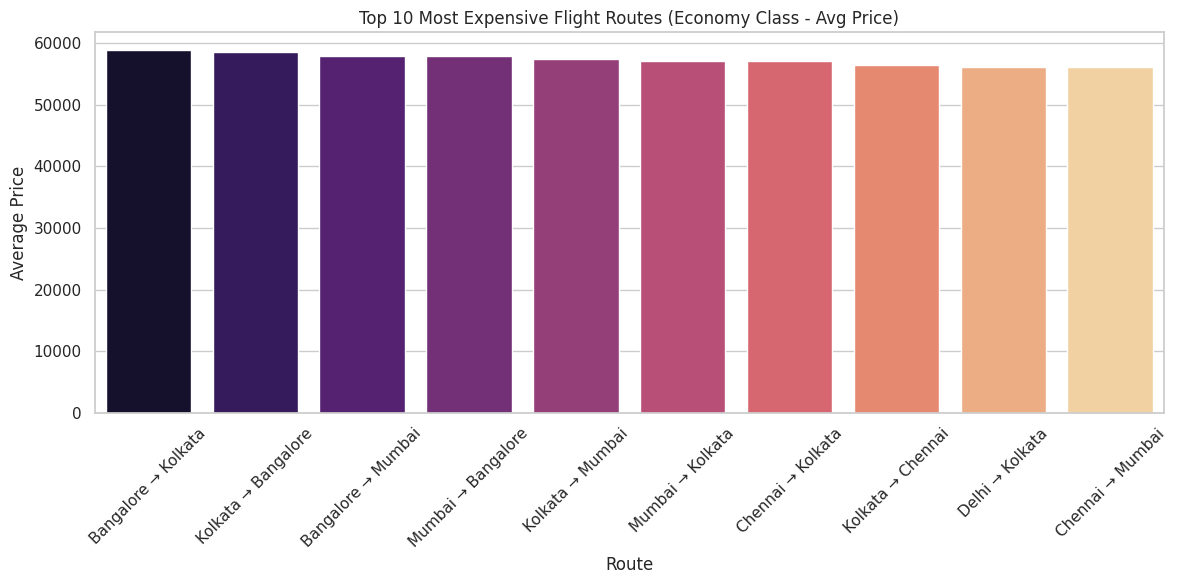

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Filter for Economy class only
economy_df = df[df['class'] == 'Business']

# Create a new column for route
economy_df['route'] = economy_df['source_city'] + " → " + economy_df['destination_city']

# Calculate average price per route
avg_price_by_route = economy_df.groupby('route')['price'].mean().sort_values(ascending=False).reset_index()

# Plot the top 10 most expensive routes (Economy only)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_route.head(10), x='route', y='price', palette="magma")

plt.title("Top 10 Most Expensive Flight Routes (Economy Class - Avg Price)")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**analyze flights between the same source → destination, and see,How many flights are on each route,Which of those have higher or lower price **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Create route column
df['route'] = df['source_city'] + " → " + df['destination_city']

# Group by route and get count, min, max, avg prices
route_summary = df.groupby('route').agg(
    flight_count=('price', 'count'),
    min_price=('price', 'min'),
    max_price=('price', 'max'),
    avg_price=('price', 'mean')
).reset_index().sort_values(by='flight_count', ascending=False)

# Display top 10 routes with most flights
print(route_summary.head(10))


                 route  flight_count  min_price  max_price     avg_price
14      Delhi → Mumbai         15289       2281      95657  19355.829812
27      Mumbai → Delhi         14809       2336     111437  18725.320008
10   Delhi → Bangalore         14012       3090      85353  17880.216315
1    Bangalore → Delhi         13756       2723     111883  17723.313972
4   Bangalore → Mumbai         12939       2150     103819  23128.618672
25  Mumbai → Bangalore         12885       2074     114523  23147.873807
29    Mumbai → Kolkata         12602       2835     100909  22379.146723
13     Delhi → Kolkata         11934       2480     117307  20566.409418
24    Kolkata → Mumbai         11467       3379     110936  22078.883579
11     Delhi → Chennai         10780       1998     104466  19369.881354


**Which flights (routes) have the least and most flight duration,Based on source_city-destination_city,Only for Economy **class **bold text**

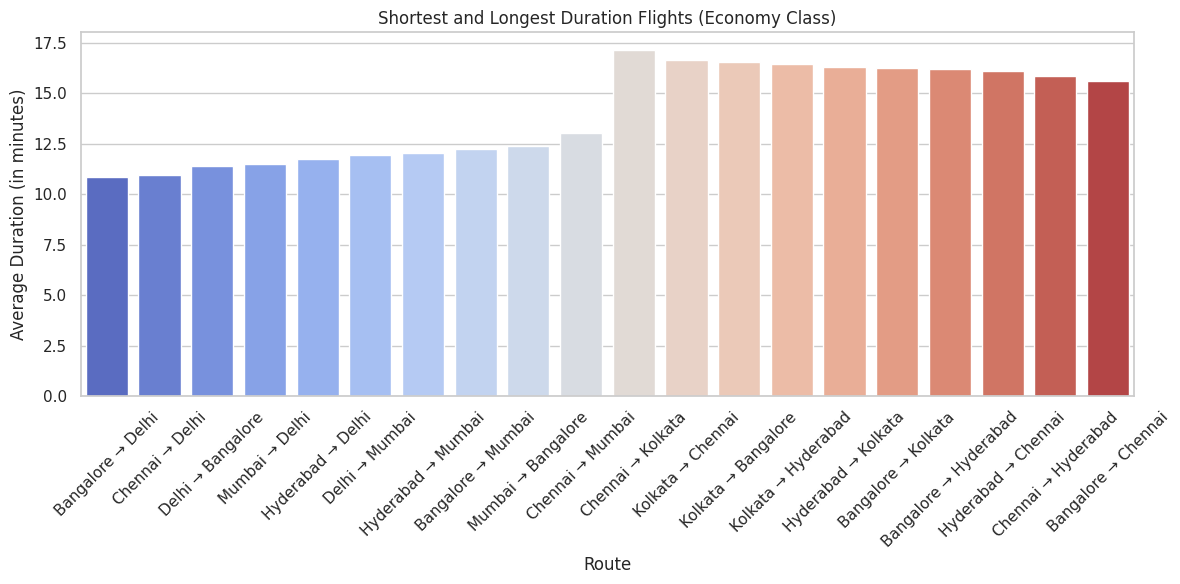

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine shortest and longest into one DataFrame
combined = pd.concat([shortest_routes, longest_routes])

plt.figure(figsize=(12, 6))
sns.barplot(data=combined, x='route', y='duration', palette='coolwarm')
plt.title("Shortest and Longest Duration Flights (Economy Class)")
plt.xlabel("Route")
plt.ylabel("Average Duration (in minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Filter only Economy class
economy_df = df[df['class'] == 'Economy']

# Create route column
economy_df['route'] = economy_df['source_city'] + " → " + economy_df['destination_city']

# Group by route and calculate average duration
route_duration = economy_df.groupby('route')['duration'].mean().reset_index()

# Sort by shortest and longest average durations
shortest_routes = route_duration.sort_values(by='duration').head(10)
longest_routes = route_duration.sort_values(by='duration', ascending=False).head(10)

print("🟢 Shortest Duration Routes (Economy):")
print(shortest_routes)

print("\n🔴 Longest Duration Routes (Economy):")
print(longest_routes)


🟢 Shortest Duration Routes (Economy):
                    route   duration
27         Mumbai → Delhi   8.966908
1       Bangalore → Delhi   9.379209
14         Delhi → Mumbai   9.537000
10      Delhi → Bangalore   9.960328
4      Bangalore → Mumbai  10.280925
17      Hyderabad → Delhi  10.452297
15  Hyderabad → Bangalore  10.725300
22        Kolkata → Delhi  10.960427
6         Chennai → Delhi  11.228305
25     Mumbai → Bangalore  11.247169

🔴 Longest Duration Routes (Economy):
                    route   duration
21      Kolkata → Chennai  13.881156
0     Bangalore → Chennai  13.859390
8       Chennai → Kolkata  13.359491
5     Chennai → Bangalore  13.277527
28     Mumbai → Hyderabad  13.146209
2   Bangalore → Hyderabad  13.118739
24       Kolkata → Mumbai  12.933720
23    Kolkata → Hyderabad  12.774077
20    Kolkata → Bangalore  12.626406
18    Hyderabad → Kolkata  12.368927


**Which flights (routes) have the least and most flight duration,Based on source_city → destination_city,Only for Business classs**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Filter only Economy class
economy_df = df[df['class'] == 'Business']

# Create route column
economy_df['route'] = economy_df['source_city'] + " → " + economy_df['destination_city']

# Group by route and calculate average duration
route_duration = economy_df.groupby('route')['duration'].mean().reset_index()

# Sort by shortest and longest average durations
shortest_routes = route_duration.sort_values(by='duration').head(10)
longest_routes = route_duration.sort_values(by='duration', ascending=False).head(10)

print("🟢 Shortest Duration Routes (Business):")
print(shortest_routes)

print("\n🔴 Longest Duration Routes (Business):")
print(longest_routes)


🟢 Shortest Duration Routes (Business):
                 route   duration
1    Bangalore → Delhi  10.831059
6      Chennai → Delhi  10.944730
10   Delhi → Bangalore  11.386874
27      Mumbai → Delhi  11.483814
17   Hyderabad → Delhi  11.742447
14      Delhi → Mumbai  11.930388
19  Hyderabad → Mumbai  12.042952
4   Bangalore → Mumbai  12.205577
25  Mumbai → Bangalore  12.372113
9     Chennai → Mumbai  13.009007

🔴 Longest Duration Routes (Business):
                    route   duration
8       Chennai → Kolkata  17.146698
21      Kolkata → Chennai  16.648412
20    Kolkata → Bangalore  16.537703
23    Kolkata → Hyderabad  16.412464
18    Hyderabad → Kolkata  16.288153
3     Bangalore → Kolkata  16.257988
2   Bangalore → Hyderabad  16.210345
16    Hyderabad → Chennai  16.108242
7     Chennai → Hyderabad  15.839278
0     Bangalore → Chennai  15.594863


**how many flights are in Economy vs Business class.**



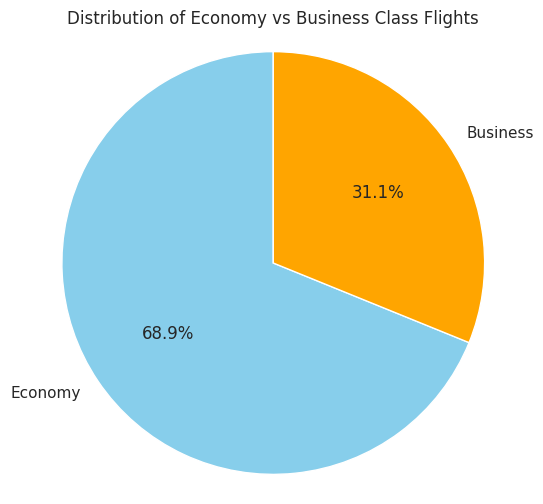

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Count flights in each class
class_counts = df['class'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "orange"])
plt.title("Distribution of Economy vs Business Class Flights")
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()


**correlation matrix to see which features are strongly related.**

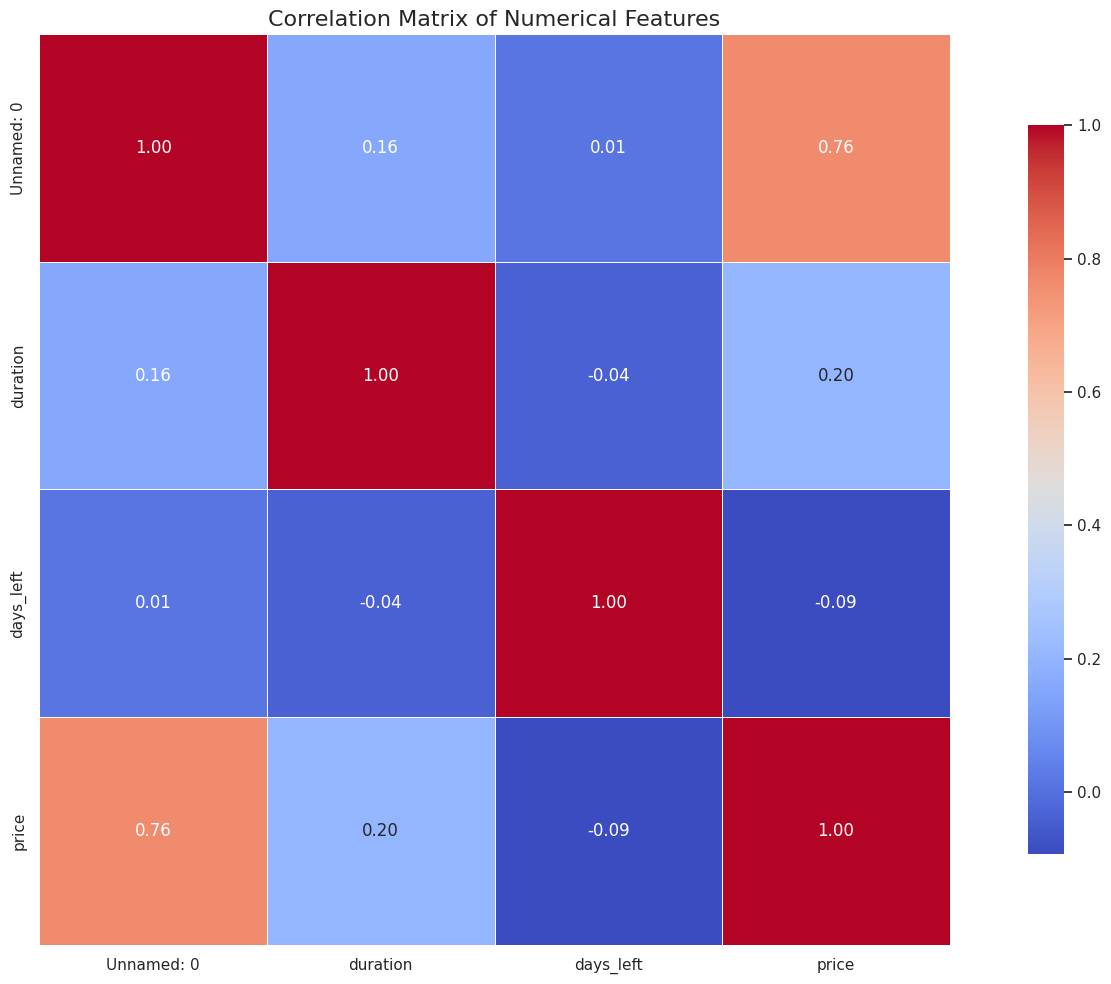

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))  # Bigger size for better readability
sns.heatmap(correlation_matrix,
            annot=True,         # Show values in cells
            fmt=".2f",          # Format to 2 decimal places
            cmap='coolwarm',    # Blue-red color range
            square=True,        # Make each cell square
            linewidths=0.5,     # Add borders between squares
            cbar_kws={"shrink": 0.8})  # Adjust color bar size

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


🔺 Top 10 Features Positively Correlated with Price:
price                       1.000000
airline_Vistara             0.360816
airline_Air_India           0.070041
arrival_time_Evening        0.056408
departure_time_Night        0.041768
arrival_time_Morning        0.030379
destination_city_Kolkata    0.020956
arrival_time_Night          0.020344
source_city_Chennai         0.018742
destination_city_Chennai    0.018473
Name: price, dtype: float64

🔻 Top 10 Features Negatively Correlated with Price:
source_city_Delhi            -0.043282
destination_city_Delhi       -0.052527
arrival_time_Early_Morning   -0.060449
stops_two_or_more            -0.064248
arrival_time_Late_Night      -0.093602
airline_SpiceJet             -0.114019
stops_zero                   -0.187277
airline_GO_FIRST             -0.194179
airline_Indigo               -0.280882
class_Economy                -0.937860
Name: price, dtype: float64


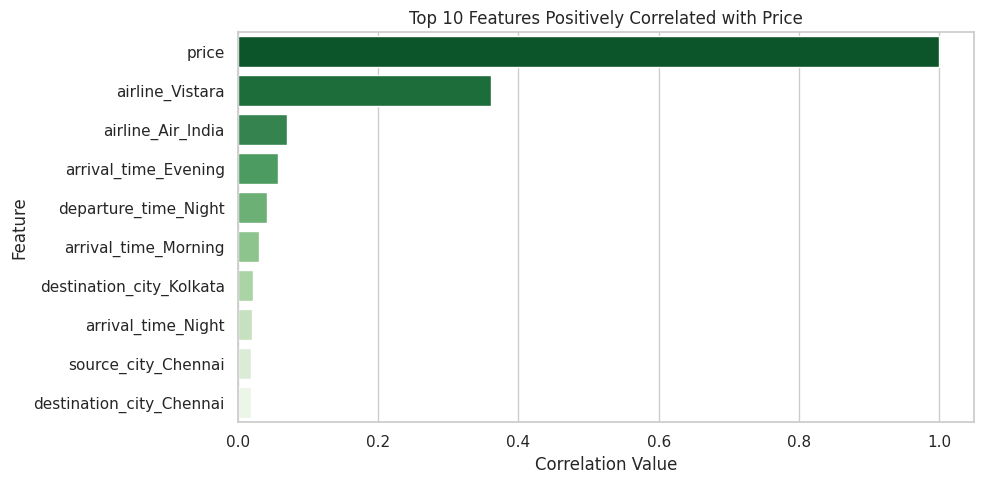

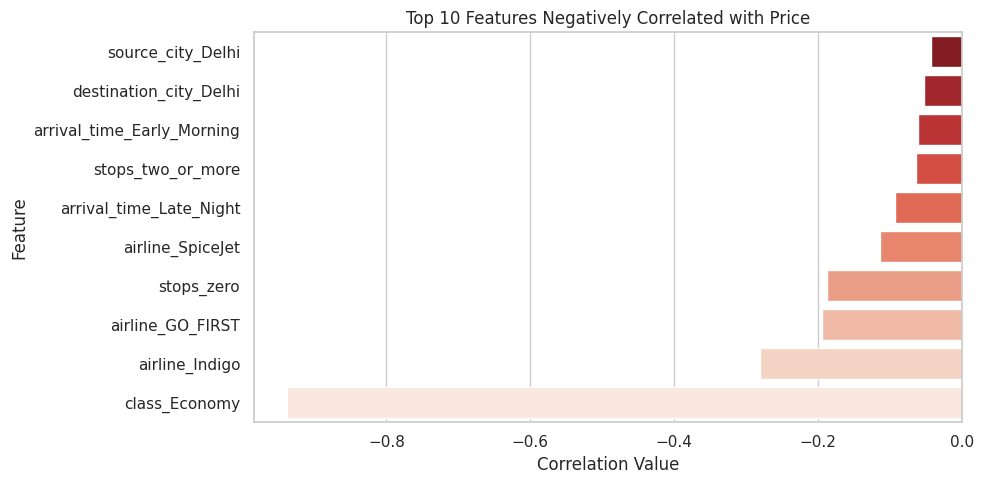

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Encode categorical features using one-hot encoding
categorical_cols = ['airline', 'source_city', 'destination_city',
                    'departure_time', 'arrival_time', 'stops', 'class']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Add 'price' column back to the encoded DataFrame
df_encoded['price'] = df['price']

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlation of all features with 'price'
price_corr = correlation_matrix['price'].sort_values(ascending=False)

# Print top 10 positively and negatively correlated features with price
print("🔺 Top 10 Features Positively Correlated with Price:")
print(price_corr.head(10))

print("\n🔻 Top 10 Features Negatively Correlated with Price:")
print(price_corr.tail(10))

# ---------------- Visualization Part ----------------

# Plot Top 10 positively correlated features with price
plt.figure(figsize=(10, 5))
sns.barplot(x=price_corr.head(10).values, y=price_corr.head(10).index, palette="Greens_r")
plt.title("Top 10 Features Positively Correlated with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot Top 10 negatively correlated features with price
plt.figure(figsize=(10, 5))
sns.barplot(x=price_corr.tail(10).values, y=price_corr.tail(10).index, palette="Reds_r")
plt.title("Top 10 Features Negatively Correlated with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 **Feature Engineering**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Convert duration to minutes (if not already)
df['duration'] = df['duration'].astype(int)  # Assuming already in minutes

# Create route column
df['route'] = df['source_city'] + " → " + df['destination_city']

# Encode 'total_stops' numerically
stop_mapping = {'non-stop': 0, 'one': 1, 'two_or_more': 2}
df['stops_encoded'] = df['stops'].map(stop_mapping)

# Encode departure time into part of day
# already done if values like Morning, Afternoon, etc.
# But we can convert to categories like below
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}
df['departure_code'] = df['departure_time'].map(time_mapping)

# One-hot encode categorical columns
cat_cols = ['airline', 'source_city', 'destination_city',
            'departure_time', 'arrival_time', 'class']

df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine all into final dataset
final_df = pd.concat([df_encoded, df[['duration', 'price', 'stops_encoded', 'departure_code']]], axis=1)


**Feature Selection**

🎯 Features most correlated with price:
price                       1.000000
airline_Vistara             0.360816
duration                    0.205079
airline_Air_India           0.070041
arrival_time_Evening        0.056408
departure_time_Night        0.041768
arrival_time_Morning        0.030379
destination_city_Kolkata    0.020956
departure_code              0.020948
arrival_time_Night          0.020344
source_city_Chennai         0.018742
destination_city_Chennai    0.018473
departure_time_Morning      0.018199
source_city_Kolkata         0.016127
source_city_Mumbai          0.013206
Name: price, dtype: float64


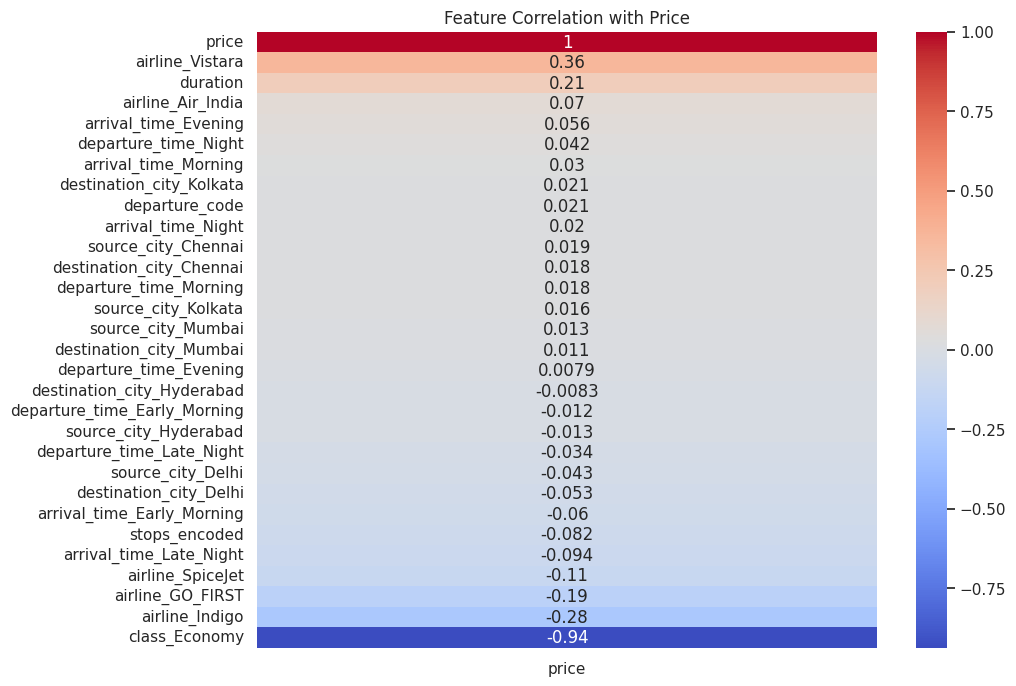

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation = final_df.corr()

# Get correlation of features with 'price'
corr_with_price = correlation['price'].sort_values(ascending=False)

print("🎯 Features most correlated with price:")
print(corr_with_price.head(15))  # Top 15

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_df.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()


This output shows how strongly each feature (column) in your dataset is correlated with the flight ticket price.
The correlation value ranges from -1 to +1:
+1 → Perfect positive relationship
-1 → Perfect negative relationship
0 → No relationship **bold text**

**Feature Scaling:**

**MinMaxScaler is applied only to the numeric columns of your dataset — not all columns.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Create and apply MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# View the scaled data (optional)
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route,stops_encoded,departure_code
0,0.000000,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0.040816,0.0,0.039749,Delhi → Mumbai,NaN,0.6
1,0.000003,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.040816,0.0,0.039749,Delhi → Mumbai,NaN,0.0
2,0.000007,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.040816,0.0,0.039773,Delhi → Mumbai,NaN,0.0
3,0.000010,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.040816,0.0,0.039765,Delhi → Mumbai,NaN,0.2
4,0.000013,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0.040816,0.0,0.039765,Delhi → Mumbai,NaN,0.2


**splitting the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

# 🎯 Step 1: Define features (X) and target (y)
X = df.drop('price', axis=1)   # All columns except 'price'
y = df['price']                # Target variable

# 🎯 Step 2: Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🎯 Step 3: Check the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (240122, 14)
Testing features shape: (60031, 14)
Training target shape: (240122,)
Testing target shape: (60031,)


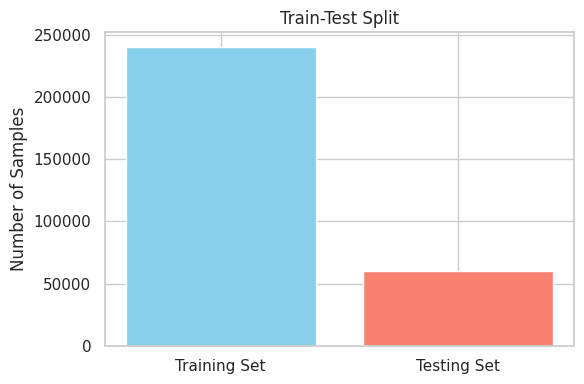

In [ ]:
import matplotlib.pyplot as plt

# Sizes of each set
train_size = len(X_train)
test_size = len(X_test)

# Labels and values
labels = ['Training Set', 'Testing Set']
sizes = [train_size, test_size]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=['skyblue', 'salmon'])
plt.title("Train-Test Split")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


**Class Distribution after SMOTE:-**

Original Class Distribution:
class
Economy     206666
Business     93487
Name: count, dtype: int64


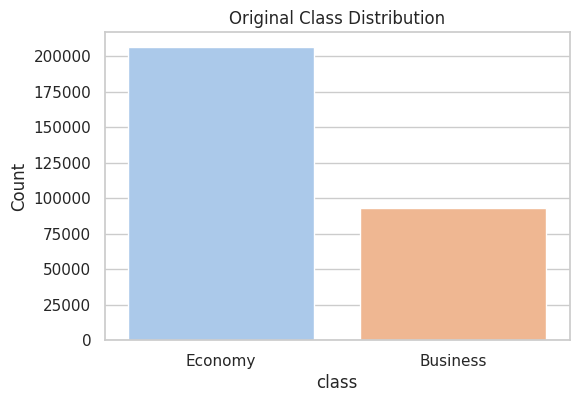

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# For a classification task, suppose we want to predict the 'class' (Economy or Business)
# First, let's see the original distribution:
print("Original Class Distribution:")
print(df['class'].value_counts())

# Plot the original distribution (optional)
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='pastel')
plt.title("Original Class Distribution")
plt.ylabel("Count")
plt.show()

# Prepare your features (X) and target (y) for classification
# Drop columns not needed (you may drop price or any continuous features if you're focusing on class)
# Here, I'll assume you're using all columns except the target 'class' for simplicity.
X = df.drop('class', axis=1)
y = df['class']

# For SMOTE, all features in X must be numeric.
# So you may need to encode categorical variables.
# For demonstration, let’s perform one-hot encoding on categorical features in X:
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to balance the classes.
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_encoded, y)

# Check and print the new class distribution
print("\nClass Distribution After SMOTE:")
print(y_res.value_counts())

# Visualize the new (balanced) class distribution using a countplot:
plt.figure(figsize=(6,4))
sns.countplot(x=y_res, palette='pastel')
plt.title("Class Distribution After SMOTE")
plt.ylabel("Count")
plt.xlabel("Flight Class")
plt.show()


***After SMOTE ***

Original Class Distribution:
class
Economy     206666
Business     93487
Name: count, dtype: int64


<ipython-input-1-1022db61e9ff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='pastel')


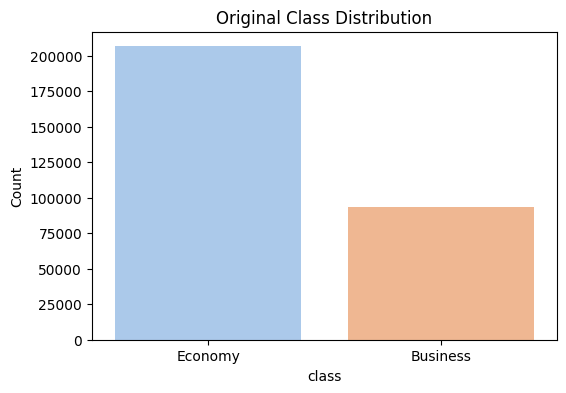

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Step 2: Print original class distribution
print("Original Class Distribution:")
print(df['class'].value_counts())

# Step 3: Plot original class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='pastel')
plt.title("Original Class Distribution")
plt.ylabel("Count")
plt.show()

# Step 4: Prepare features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Step 5: Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 6: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Step 7: Print class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())

# Step 8: Plot class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette='pastel')
plt.title("Class Distribution After SMOTE")
plt.ylabel("Count")
plt.xlabel("Flight Class")
plt.show()

# Step 9: Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 10: Check the new shape
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


**train and test data**

In [4]:
from sklearn.model_selection import train_test_split

# 🎯 Step 1: Define features (X) and target (y)
X = df.drop('price', axis=1)   # All columns except 'price'
y = df['price']                # Target variable

# 🎯 Step 2: Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🎯 Step 3: Check the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (240122, 11)
Testing features shape: (60031, 11)
Training target shape: (240122,)
Testing target shape: (60031,)


** Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Step 1: Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 🎯 Step 2: Fit the model on the training data
logreg.fit(X_train, y_train)

# 🎯 Step 3: Predict on the test set
y_pred = logreg.predict(X_test)

# 🎯 Step 4: Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🎯 Step 5: Plot the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Decision Tree Classifier **

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("/content/Clean_Dataset.csv (1).zip")

# Step 2: Create binary target column
df["is_expensive"] = df["price"].apply(lambda x: 1 if x > 8000 else 0)

# Step 3: Drop unwanted columns
df = df.drop(["Unnamed: 0", "price"], axis=1)

# Step 4: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 5: Split into features and target
X = df_encoded.drop("is_expensive", axis=1)
y = df_encoded["is_expensive"]

# Step 6: Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 8: Train the model
dt_model.fit(x_train, y_train)

# Step 9: Make predictions
y_pred = dt_model.predict(x_test)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     31872
           1       0.97      0.97      0.97     28159

    accuracy                           0.98     60031
   macro avg       0.98      0.98      0.98     60031
weighted avg       0.98      0.98      0.98     60031


Confusion Matrix:
 [[31132   740]
 [  721 27438]]


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
tree.plot_tree(dt_model, filled=True)
plt.title("Simple Decision Tree")
plt.show()
